# Bag of Visual Words using Sift with Kmeans Classifier

In [1]:
import numpy as np
import cv2
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
def getDir(folder):
    img_dir = []
    for i in os.listdir(folder):
        img_dir.append(folder+i)
    return img_dir

In [3]:
def get_descriptor(sift, img):
    kp, desc = sift.detectAndCompute(img, None)
    return desc

In [4]:
def feature_extraction(kmeans, list_dp, img_len, clusters):
    feature_img = np.array([np.zeros(clusters) for i in range(img_len)])
    for i in range(img_len):
        for j in range(len(list_dp[i])):
            feature = list_dp[i][j]
            feature = feature.reshape(1, 128)
            index = kmeans.predict(feature)
            feature_img[i][index] += 1

    return feature_img

In [5]:
def kmean_clustering(descriptors, clusters):
    kmeans = KMeans(n_clusters = clusters).fit(descriptors)
    return kmeans

In [6]:
def join_descriptor(list_dp):
    descriptors = np.array(list_dp[0])
    for descriptor in list_dp[1:]:
        descriptors = np.vstack((descriptors, descriptor)) 
    return descriptors

In [7]:
def plot_hist(feature_img, clusters):
    x = np.arange(clusters)
    y = np.array([abs(np.sum(feature_img[:,i],dtype=np.int32)) for i in range(clusters)])

    plt.xticks(x + .5, x)
    plt.title("completed vocabulary")
    plt.ylabel("frequency")
    plt.xlabel("visual word index")
    plt.bar(x, y)
    plt.show()

In [8]:
images = getDir('UAS dataset/Dataset_P1/train/') 
list_dp = []
sift = cv2.xfeatures2d.SIFT_create()
train_labels = np.array([])
label_count = 4
len_images = len(images)

#generate the list of descriptor
for i in images:
    img = cv2.imread(i, 0)
    des = get_descriptor(sift, img)
    list_dp.append(des)

In [9]:
clusters=120

# histogram for the train images after clustering

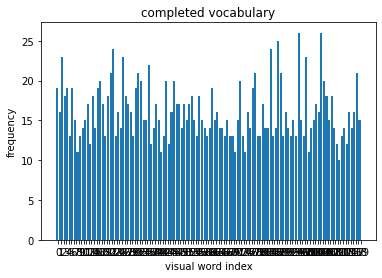

In [10]:
#get the total list of descriptor from each image
total_desc = join_descriptor(list_dp)

#define the kmeans clustering
kmeans = kmean_clustering(total_desc, clusters)

#extract the feature from the images
feature_img = feature_extraction(kmeans, list_dp, len_images, clusters)

#scaling the feature using standard scaler
ss_scaler = StandardScaler().fit(feature_img)        
feature_img = ss_scaler.transform(feature_img)

#plot the histogram
plot_hist(feature_img, clusters)

In [11]:
def generate_SVM(feature_img, train_labels, kernel):
    features = feature_img
    if(kernel == "precomputed"):
        features = np.dot(feature_img, feature_img.T)

In [12]:
kernel = 'linear'
svm = generate_SVM(feature_img, train_labels, kernel)

In [13]:
train_labels = np.array([])
images_test = getDir('UAS dataset/Dataset_P1/train/') 
for img_path in images_test:
    #generate the label from each images
    if("113" in img_path):
        class_index = 0
    elif("840" in img_path):
        class_index = 1
    elif("644" in img_path):
        class_index = 2
    elif("443" in img_path):
        class_index = 3
    elif("581" in img_path):
        class_index = 4
    else:
        class_index = 5
    train_labels = np.append(train_labels, class_index)

In [14]:
print(train_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


In [15]:
from sklearn import svm

In [16]:
name_dict =	{"0": "horse","1": "flower","2": "dinosaur","3": "doll","4": "bus"}

In [17]:
test_img = getDir('UAS dataset/Dataset_P1/Query/')
list_dp_test = []
sift = cv2.xfeatures2d.SIFT_create()
count = 0
clas = []
for i in test_img:
    #read image
    img = cv2.imread(i)
    
    #get the descriptor from the query images
    des = get_descriptor(sift, img)
    if(des is not None):
        count += 1
        list_dp_test.append(des)
#         print(i)
        #define the vector of the class from each labels
        if("Q1" in i):
            clas.append('horse')
        elif("Q2" in i):
            clas.append('flower')
        elif("Q3" in i):
            clas.append('dinosaur')
        elif("Q4" in i):
            clas.append('doll')

In [18]:
print(clas)

['horse', 'flower', 'dinosaur', 'doll']


In [19]:
descriptors = join_descriptor(list_dp_test)

test_features = feature_extraction(kmeans, list_dp_test, count, clusters)

test_features = ss_scaler.transform(test_features)

kernel_test = test_features

clf = svm.SVC()

clf.fit(feature_img, train_labels)

predictions = [name_dict[str(int(i))] for i in clf.predict(kernel_test)]

# plot the histogram for visual words of the query images

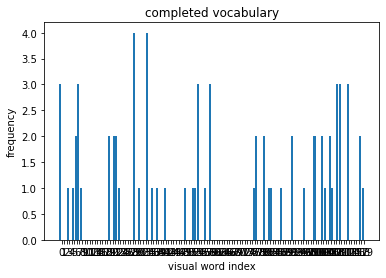

In [20]:
plot_hist(test_features, clusters)

# Cosine Similarity

In [21]:
from scipy.spatial.distance import cosine

Q1_sim = []
Q2_sim = []
Q3_sim = []
Q4_sim = []
not_used = []

# find the similarity of each images depending on the class
for i,img in enumerate(images):
    if("113" in img):
        Q1_similarity = 1 - cosine(test_features[0], feature_img[i])
        Q1_sim.append(Q1_similarity)
    elif("840" in img):
        Q2_similarity = 1 - cosine(test_features[1], feature_img[i])
        Q2_sim.append(Q2_similarity)
    elif("644" in img):
        Q3_similarity = 1 - cosine(test_features[2], feature_img[i])
        Q3_sim.append(Q3_similarity)
    elif("443" in img):
        Q4_similarity = 1 - cosine(test_features[3], feature_img[i])
        Q4_sim.append(Q4_similarity)
    else:
        not_used.append(img)

In [22]:
horse = []
flower = []
dinosaur = []
doll = []
not_in_class = []

# append the images according to the labels and because there is only 4 label, i want to append it on not used variable
for img in images:
    if("113" in img):
        horse.append(img)
    elif("840" in img):
        flower.append(img)
    elif("644" in img):
        dinosaur.append(img)
    elif("443" in img):
        doll.append(img)
    else:
        not_in_class.append(img)

In [23]:
# append the labels 
label = []
not_used = []
for img_path in images:
    #generate the label from each images
    if("113" in img_path):
        label.append(0)
    elif("840" in img_path):
        label.append(1)
    elif("644" in img_path):
        label.append(2)
    elif("443" in img_path):
        label.append(3)
    else:
        not_used.append(img)

In [24]:
import itertools
image_listing = itertools.chain(horse, flower, dinosaur,doll)
similarity_list = itertools.chain(Q1_sim, Q2_sim,Q3_sim,Q4_sim)

In [25]:
import pandas as pd

df = pd.DataFrame(np.column_stack([list(image_listing), list(similarity_list), label]), columns=['image','cosine similarity','label'])

In [26]:
df.sample(n=10)

,image,cosine similarity,label
15,UAS dataset/Dataset_P1/train/84007.jpg,-0.07195692058804237,3
22,UAS dataset/Dataset_P1/train/84021.jpg,0.9274114891927051,3
11,UAS dataset/Dataset_P1/train/113083.jpg,0.08421540928861337,0
35,UAS dataset/Dataset_P1/train/644005.jpg,0.40452416138213254,2
8,UAS dataset/Dataset_P1/train/113058.jpg,0.10501614842224849,0
19,UAS dataset/Dataset_P1/train/84015.jpg,0.1775633749673946,3
56,UAS dataset/Dataset_P1/train/443027.jpg,0.24834819720141155,1
36,UAS dataset/Dataset_P1/train/644006.jpg,0.16432138942859642,2
33,UAS dataset/Dataset_P1/train/644003.jpg,0.24587728793240005,2
23,UAS dataset/Dataset_P1/train/84025.jpg,0.043852177938849546,3


In [27]:
from sklearn.model_selection import train_test_split
X = df[["cosine similarity"]]
y = df[["label"]]

In [28]:
from sklearn.preprocessing import label_binarize

y_binarize = label_binarize(y, classes=['0','1', '2','3'])
n_classes = y_binarize.shape[1]
# Split into training and test
train_X, test_X, train_Y, test_Y = train_test_split(X, y_binarize, test_size=.2,random_state=20)

In [29]:
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=20))

#fit the classifier
classifier.fit(train_X, train_Y)

# declare the y_score 
y_score = classifier.decision_function(test_X)

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# declare the recall, precision and avg precision as dict
recall = dict()
precision = dict()
average_precision = dict()

for i in range(n_classes):
    #calculate the avg precision
    average_precision[i] = average_precision_score(test_Y[:, i], y_score[:, i])
    
    #calculate the precision and recall
    precision[i], recall[i], _ = precision_recall_curve(test_Y[:, i],y_score[:, i])
    
# calculating the micro average, precision and recall
precision["micro"], recall["micro"], _ = precision_recall_curve(test_Y.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(test_Y, y_score, average="micro")
print('avg precision, micro averaged over all the classes : ',(average_precision["micro"]))

avg precision, micro averaged over all the classes :  0.45654002699575796


Text(0.5, 1.0, 'avg precision score, micro-averaged over all classes: Average precision =0.46')

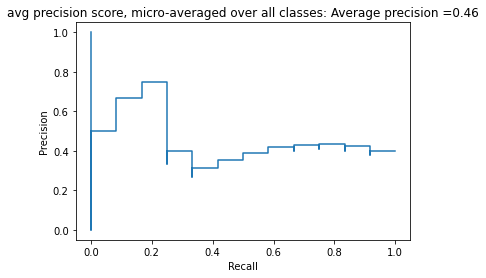

In [31]:
plt.figure()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.step(recall['micro'], precision['micro'], where='post')
plt.title('avg precision score, micro-averaged over all classes: Average precision ={0:0.2f}'.format(average_precision["micro"]))